In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, mean_absolute_error

sns.set_theme(style="darkgrid")

#######
# Funciones de utilidad
def pintaDigito(df_Xc, df_Xr, nan_mat, indice):
    imagenI= df_Xc.iloc[indice].values.reshape(28,28)
    imagenF= df_Xr[indice].reshape(28,28)
    mask=nan_mat[indice].reshape(28,28)

    imagenAciertos= np.dstack([imagenI, imagenI, imagenI])
    #Falsos
    imagenAciertos[((imagenI!=imagenF) & mask),:]=[255,0,0]
    #Verdaderos
    imagenAciertos[((imagenI==imagenF) & mask),:]=[0,255,0]
    fig, ax = plt.subplots(figsize=(5,4))
    plt.axis('off')

    plt.imshow(imagenAciertos)
    plt.show()


def pintaDigitoReco(df_Xr, indice,titulo):
    imagenF= df_Xr[indice].reshape(28,28)
    imagenReco= np.dstack([imagenF, imagenF, imagenF])
    
    fig, ax = plt.subplots(figsize=(5,4))
    plt.axis('off')
    plt.imshow(imagenReco,origin = 'upper', aspect = 1)
    
    
    plt.title(titulo)
    plt.savefig(titulo+".png")
    plt.show()

ruta="Cap5Bl1/"

# Cargamos digitos y errores del Baseline y representamos
Tanto original como reconstruidos.

In [49]:
#Cargamos resultados (!Ojo! Son antes de truncar y normalizados!!!!!!!!!!!!!!!!!!!!!!!!) 
ruta2="Exp1_Baseline/"
resultados = pd.read_pickle(ruta+ruta2+'resultados_MNIST_Baseline.pkl').xs('MNIST')
resultados

,mae,rmse,mse,accuracy
ceros,0.139330,0.343233,0.117809,0.787642
mean,0.120808,0.230611,0.053182,0.462678
knn,0.104341,0.210217,0.044191,0.521193
svd,0.088629,0.173832,0.030218,0.462678
mice,0.077838,0.158019,0.024970,0.462678
spectral,0.076927,0.157667,0.024859,0.336922


In [42]:
#Seleccionamos el dígito 'indice' a representar
indice=20

#Cargamos original y máscara
df_Xc=np.loadtxt(ruta+ruta2+'resultados_Orig_Baseline.txt',  delimiter=',').astype(int)
nan_mat=np.loadtxt(ruta+ruta2+'MNIST_nanMat.txt',  delimiter=',').astype(bool)

## Baseline

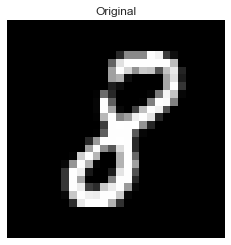

ceros


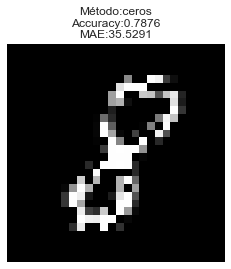

mean


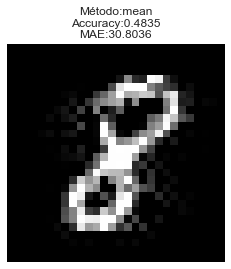

knn


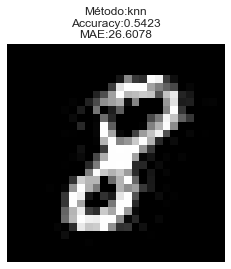

mice


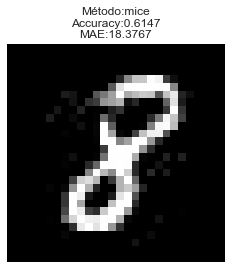

svd


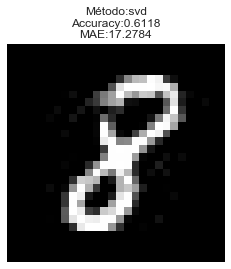

spectral


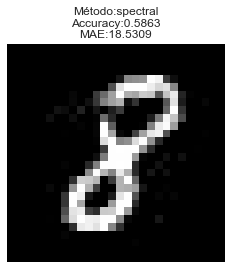

In [8]:

#Representamos Reconstruidos

#Baseline
ruta2="Exp1_Baseline/"
met=['ceros','mean', 'knn', 'mice', 'svd', 'spectral']
pintaDigitoReco(df_Xc,indice,"Original")
for m in met:
    print(m)
    A=np.loadtxt(ruta+ruta2+'resultados_'+m+'_Baseline.txt',  delimiter=',').astype(int)
    accuracy_real=accuracy_score(df_Xc[nan_mat].reshape(-1) , A[nan_mat].reshape(-1))
    mae_real=mean_absolute_error(df_Xc[nan_mat].reshape(-1), A[nan_mat].reshape(-1))
    pintaDigitoReco(A,indice,"Método:"+m
                    +"\nAccuracy:{:.4f}".format(accuracy_real)
                    +"\nMAE:{:.4f}".format(mae_real))



ceros


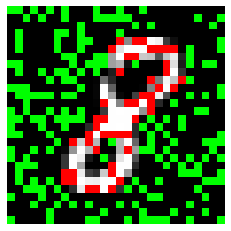

mean


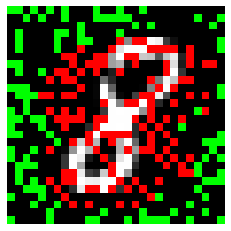

knn


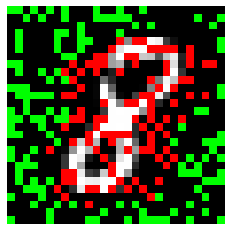

mice


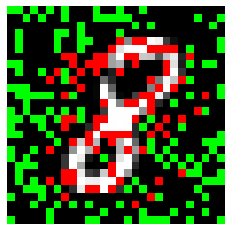

svd


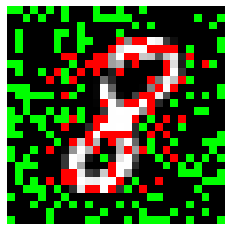

spectral


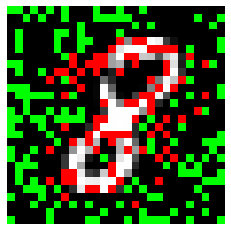

In [9]:
#Representamos errores
for m in met:
    print(m)
    A=np.loadtxt(ruta+ruta2+'resultados_'+m+'_Baseline.txt',  delimiter=',').astype(int)
    pintaDigito(pd.DataFrame(df_Xc), A, nan_mat, indice)
    

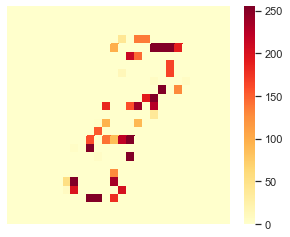

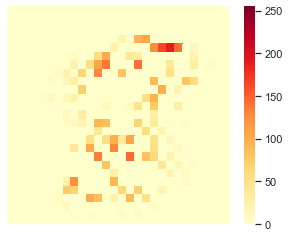

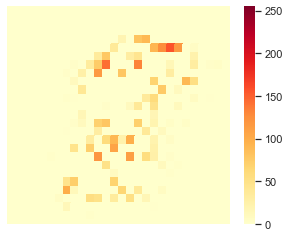

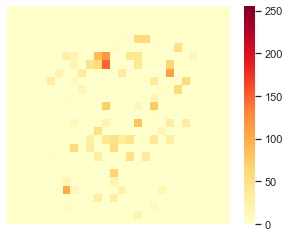

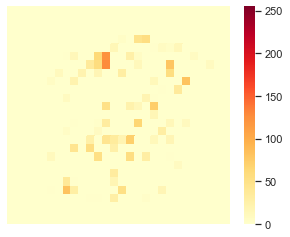

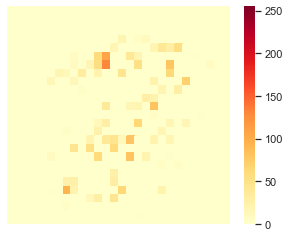

In [10]:
#Representamos Heatmap
for m in met:
    A=np.loadtxt(ruta+ruta2+'resultados_'+m+'_Baseline.txt',  delimiter=',').astype(int)
    fig, ax = plt.subplots(figsize=(5,4))
    hs=sns.heatmap(abs(df_Xc[indice]-A[indice]).reshape(28,28),cmap="YlOrRd",vmax=255,vmin=0,ax=ax)
    #hs.set_title(m)
    plt.axis('off')
    plt.savefig("hs_"+m+".png")
    plt.show()

# PARTE 1: Experimentos con GRAPE

## GRAPE Clasificación

In [11]:
#Grape con 20k epochs (!Ojo! Son antes de truncar y normalizados!!!!!!!!!!!!!!!!!!!!!!!!) 
#Cargamos resultados
ruta2="Exp1_GRAPE_C/"
resultados = pd.read_pickle(ruta+ruta2+'resultados_MNIST_grapeBasicoClas.pkl').xs('MNIST')
resultados

,mae,rmse,mse,accuracy
0,0.097213,0.266215,0.070871,0.795983


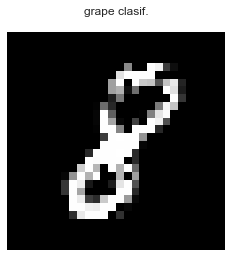

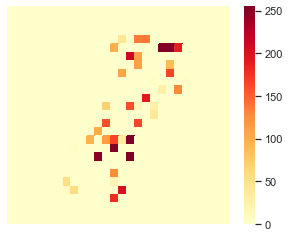

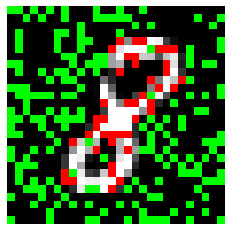

In [12]:
val=[]
for l in ["e3","e2","e1","e0"]:
    df_Xg=np.loadtxt(ruta+ruta2+"resultados_grapeBasicoClas_"+l+ ".txt",  delimiter=',').astype(int)
    accuracy_real=accuracy_score(df_Xc[nan_mat].reshape(-1) , df_Xg[nan_mat].reshape(-1))
    mae_real=mean_absolute_error(df_Xc[nan_mat].reshape(-1), df_Xg[nan_mat].reshape(-1))
    val.append([accuracy_real,mae_real])

pintaDigitoReco(df_Xg,indice,"grape clasif.\n")#"Método: "+m
                    #+"\nAccuracy:{:.4f}".format(accuracy_real)
                    #+"\nMAE:{:.4f}".format(mae_real))
fig, ax = plt.subplots(figsize=(5,4))
hs=sns.heatmap(abs(df_Xc[indice]-df_Xg[indice]).reshape(28,28),cmap="YlOrRd",vmax=255,vmin=0,ax=ax)
#hs.set_title(m)
plt.axis('off')
#plt.savefig("hs_"+"gra_clas"+".png")
plt.show()
pintaDigito(pd.DataFrame(df_Xc), df_Xg, nan_mat, indice)

In [13]:
#Media y desviación de los experimentos. Son x experimentos
for i,l in zip([0,1],["Accuracy","MAE"]):
    print(l,"-->Media:",np.array(val)[:,i].mean(),"Desviación:",np.array(val)[:,i].std())
print("\nValores\n========" )
print(pd.DataFrame(val,columns =["Media","MAE"]))

Accuracy -->Media: 0.7978551366073708 Desviación: 0.005731440646529359
MAE -->Media: 25.059547621074138 Desviación: 0.41986440799438807

Valores
      Media        MAE
0  0.807218  24.711124
1  0.796578  25.768448
2  0.791642  24.969402
3  0.795983  24.789216


## GRAPE Clasificación con Pesos

In [43]:
#Grape con 20k epochs (!Ojo! Son antes de truncar y normalizados!!!!!!!!!!!!!!!!!!!!!!!!) 
#Cargamos resultados
ruta2="Exp1_GRAPE_CP/"
resultados = pd.read_pickle(ruta+ruta2+'resultados_MNIST_grapeBasicoClasPesos.pkl').xs('MNIST')
resultados

,mae,rmse,mse,accuracy
0,0.216845,0.346133,0.119808,0.446719


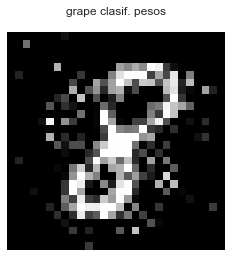

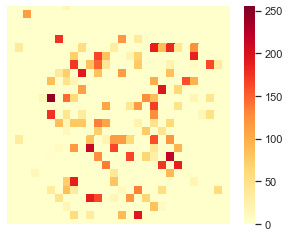

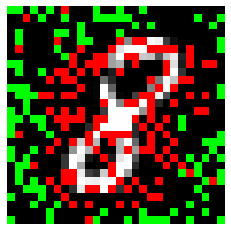

In [44]:
val=[]
for l in ["e3","e2","e1","e0"]:
    df_Xg=np.loadtxt(ruta+ruta2+"resultados_grapeBasicoClasP_"+l+ ".txt",  delimiter=',').astype(int)
    accuracy_real=accuracy_score(df_Xc[nan_mat].reshape(-1) , df_Xg[nan_mat].reshape(-1))
    mae_real=mean_absolute_error(df_Xc[nan_mat].reshape(-1), df_Xg[nan_mat].reshape(-1))
    val.append([accuracy_real,mae_real])

pintaDigitoReco(df_Xg,indice,"grape clasif. pesos\n")#"Método: "+m
                    #+"\nAccuracy:{:.4f}".format(accuracy_real)
                    #+"\nMAE:{:.4f}".format(mae_real))
fig, ax = plt.subplots(figsize=(5,4))
hs=sns.heatmap(abs(df_Xc[indice]-df_Xg[indice]).reshape(28,28),cmap="YlOrRd",vmax=255,vmin=0,ax=ax)
#hs.set_title(m)
plt.axis('off')
#plt.savefig("hs_"+"gra_clas"+".png")
plt.show()
pintaDigito(pd.DataFrame(df_Xc), df_Xg, nan_mat, indice)


In [45]:
#Media y desviación de los experimentos. Son x experimentos
for i,l in zip([0,1],["Accuracy","MAE"]):
    print(l,"-->Media:",np.array(val)[:,i].mean(),"Desviación:",np.array(val)[:,i].std())
print("\nValores\n========" )
print(pd.DataFrame(val,columns =["Media","MAE"]))

Accuracy -->Media: 0.44879351434164605 Desviación: 0.01755530127854261
MAE -->Media: 55.21032641075836 Desviación: 2.5022970994062996

Valores
      Media        MAE
0  0.425653  58.598817
1  0.469019  51.848540
2  0.462167  54.133458
3  0.438335  56.260490


## GRAPE FASES

In [18]:
#Dos fases (!Ojo! Son antes de truncar y normalizados!!!!!!!!!!!!!!!!!!!!!!!!) 
# Epoch Fase 1=2000
# Epoch Fase 1=20000
#Cargamos resultados
ruta2="Exp1_GRAPE_F/"
resultados = pd.read_pickle(ruta+ruta2+'resultados_MNIST_grapeFasesClas.pkl').xs('MNIST')
resultados

,fase,mae,rmse,mse,accuracy
0,1,0.106225,0.291330,0.084873,0.808239
1,2,0.083160,0.248478,0.061741,0.823304


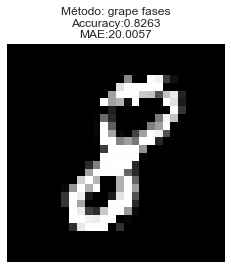

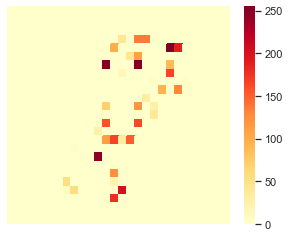

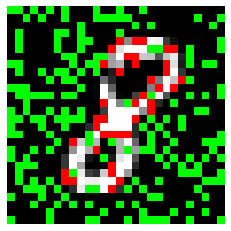

In [20]:

val=[]
for l in ["e2","e1","e0","e3"]:
    df_Xg=np.loadtxt(ruta+ruta2+"resultados_grapeFasesClas_"+l+ ".txt",  delimiter=',').astype(int)
    accuracy_real=accuracy_score(df_Xc[nan_mat].reshape(-1) , df_Xg[nan_mat].reshape(-1))
    mae_real=mean_absolute_error(df_Xc[nan_mat].reshape(-1), df_Xg[nan_mat].reshape(-1))
    val.append([accuracy_real,mae_real])

pintaDigitoReco(df_Xg,indice,"Método: grape fases"
                    +"\nAccuracy:{:.4f}".format(accuracy_real)
                    +"\nMAE:{:.4f}".format(mae_real))
fig, ax = plt.subplots(figsize=(5,4))
hs=sns.heatmap(abs(df_Xc[indice]-df_Xg[indice]).reshape(28,28),cmap="YlOrRd",vmax=255,vmin=0,ax=ax)
#hs.set_title('grape fases')
plt.axis('off')
plt.savefig("hs_"+"gra_fases"+".png")
plt.show()
pintaDigito(pd.DataFrame(df_Xc), df_Xg, nan_mat, indice)

In [21]:
#Media y desviación de los experimentos. Son 4 experimentos
for i,l in zip([0,1],["Accuracy","MAE"]):
    print(l,"-->Media:",np.array(val)[:,i].mean(),"Desviación:",np.array(val)[:,i].std())
print("\nValores\n========" )
print(pd.DataFrame(val,columns =["Media","MAE"]))

Accuracy -->Media: 0.8244318665418334 Desviación: 0.0011349591755123558
MAE -->Media: 20.606445229381222 Desviación: 0.4620769078943993

Valores
      Media        MAE
0  0.824070  20.866031
1  0.823304  21.205720
2  0.824028  20.348370
3  0.826326  20.005660


## GRAPE Regresión

In [23]:
# Como problema de regresion
# Epoch Fase 20.000
#Cargamos resultados sin redondear, ni truncar
ruta2="Exp1_GRAPE_R/"
resultados = pd.read_pickle(ruta+ruta2+'resultados_MNIST_grapeBasicoReg.pkl').xs('MNIST')
resultados

,mae,rmse,mse,accuracy
0,0.125923,1.361564,1.853857,0.0


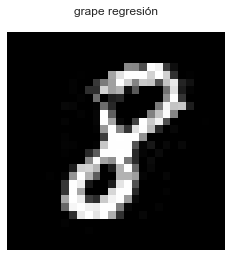

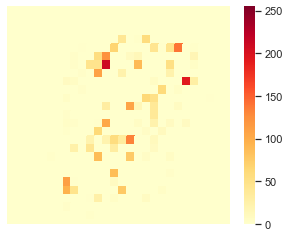

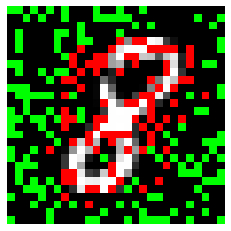

In [24]:
val=[]
for l in ["e3ok","e2ok","e1ok","e0ok"]:
    df_Xg=np.loadtxt(ruta+ruta2+"resultados_grapeBasicoReg_"+l+ ".txt",  delimiter=',').astype(int)
    accuracy_real=accuracy_score(df_Xc[nan_mat].reshape(-1) , df_Xg[nan_mat].reshape(-1))
    mae_real=mean_absolute_error(df_Xc[nan_mat].reshape(-1), df_Xg[nan_mat].reshape(-1))
    val.append([accuracy_real,mae_real])

pintaDigitoReco(df_Xg,indice,"grape regresión\n")#"Método: "+m
                    #+"\nAccuracy:{:.4f}".format(accuracy_real)
                    #+"\nMAE:{:.4f}".format(mae_real))
fig, ax = plt.subplots(figsize=(5,4))
hs=sns.heatmap(abs(df_Xc[indice]-df_Xg[indice]).reshape(28,28),cmap="YlOrRd",vmax=255,vmin=0,ax=ax)
#hs.set_title(m)
plt.axis('off')
#plt.savefig("hs_"+"gra_reg"+".png")
plt.show()
pintaDigito(pd.DataFrame(df_Xc), df_Xg, nan_mat, indice)

In [25]:
#Media y desviación de los experimentos. Son 4 experimentos
for i,l in zip([0,1],["Accuracy","MAE"]):
    print(l,"-->Media:",np.array(val)[:,i].mean(),"Desviación:",np.array(val)[:,i].std())
print("\nValores\n========" )
print(pd.DataFrame(val,columns =["Media","MAE"]))

Accuracy -->Media: 0.6034768916503532 Desviación: 0.01937355400410012
MAE -->Media: 21.90325772406162 Desviación: 0.30553608700504176

Valores
      Media        MAE
0  0.626990  21.489786
1  0.577326  22.296323
2  0.616223  21.758958
3  0.593370  22.067963


# PARTE II: Resultados de aplicar red a resto de 8's

In [46]:
ruta2="Exp2_Nuevos/"
df_Xc=np.loadtxt(ruta+ruta2+'resultados_resto8s.txt',  delimiter=',').astype(int)
nan_mat=np.loadtxt(ruta+ruta2+'MNIST_nanMat_resto8s.txt',  delimiter=',').astype(bool)

# Creamos función para cargar los resultados y calcular MAE y accuracy
def calculaAccMAE(fichero,etiqueta,pinta=False,indice=230):
    df_Xg=np.loadtxt(ruta+fichero,  delimiter=',').astype(int)
    accuracy_real=accuracy_score(df_Xc[nan_mat].reshape(-1) , df_Xg[nan_mat].reshape(-1))
    mae_real=mean_absolute_error(df_Xc[nan_mat].reshape(-1), df_Xg[nan_mat].reshape(-1))
    print(etiqueta)
    print("------------")
    print ("Accuracy:",accuracy_real, "MAE:", mae_real)
    if pinta:
        pintaDigitoReco(df_Xg,indice,"grape regresión\n")#"Método: "+m
                        #+"\nAccuracy:{:.4f}".format(accuracy_real)
                        #+"\nMAE:{:.4f}".format(mae_real))
        fig, ax = plt.subplots(figsize=(5,4))
        hs=sns.heatmap(abs(df_Xc[indice]-df_Xg[indice]).reshape(28,28),cmap="YlOrRd",vmax=255,vmin=0,ax=ax)
        #hs.set_title(m)
        plt.axis('off')
        plt.show()
        pintaDigito(pd.DataFrame(df_Xc), df_Xg, nan_mat, indice)

In [30]:
#Rellenamos con ceros
calculaAccMAE(ruta2+"resultados_ceros_prediccion_nuevos.txt","Modelo rellenar con ceros")


Modelo rellenar con ceros
------------
Accuracy: 0.7788907313531812 MAE: 38.31605869041449


In [32]:
#Usamos SVD
calculaAccMAE(ruta2+"resultados_svd_prediccion_nuevos.txt","Modelo SVD")

Modelo SVD
------------
Accuracy: 0.603922502156866 MAE: 10.224897368660347


## Regresión

Modelo Grape RegresiÓn
------------
Accuracy: 0.5862668806652389 MAE: 26.980700946359647


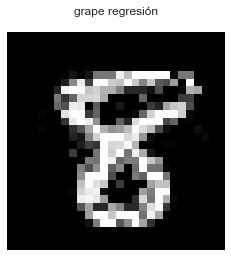

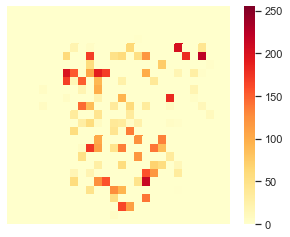

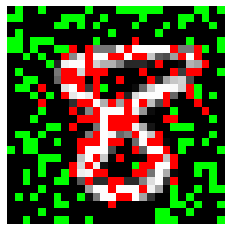

In [33]:
# Grape Regresión
calculaAccMAE(ruta2+"resultados_reg_prediccion_nuevos.txt","Modelo Grape RegresiÓn",pinta=True)

## Clasificación

Modelo Grape Clasificación
------------
Accuracy: 0.7716132027557614 MAE: 29.03905942156807


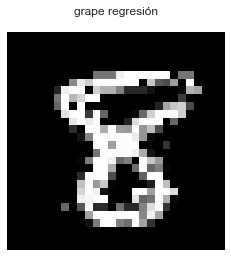

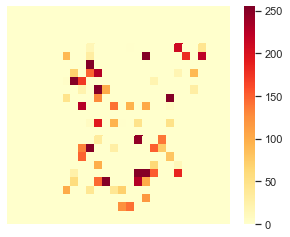

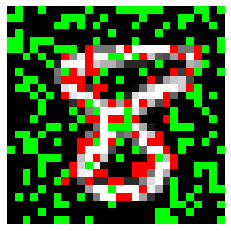

In [34]:
# Grape Regresión
calculaAccMAE(ruta2+"resultados_clas_prediccion_nuevos.txt","Modelo Grape Clasificación",pinta=True)

## Fases

Modelo Grape Fases
------------
Accuracy: 0.7739197741925706 MAE: 27.42775441224198


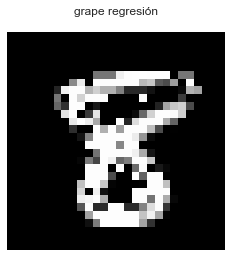

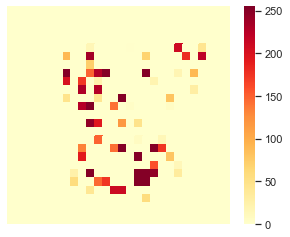

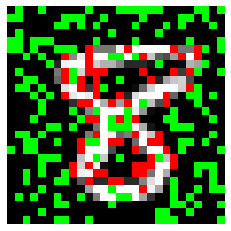

In [35]:
# Grape Fases
calculaAccMAE(ruta2+"resultados_fases_prediccion_nuevos.txt","Modelo Grape Fases",pinta=True)

# Parte III: Intentamos reconstruir 3's a los que les hemos quitado pixeles aleatoriamente

In [51]:
ruta2="Exp3_Tres/"

0


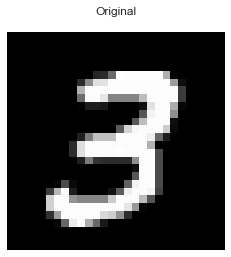

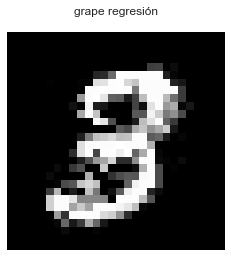

14


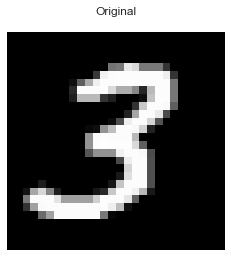

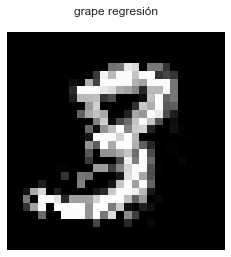

30


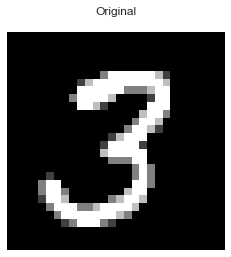

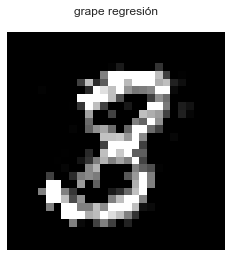

39


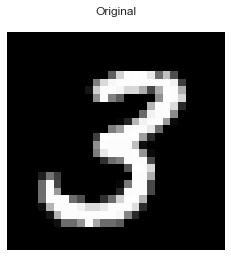

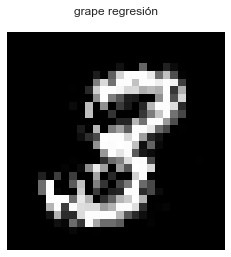

95


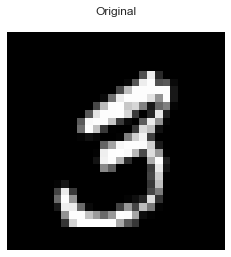

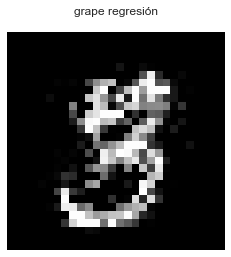

In [47]:

df_Xc=np.loadtxt(ruta+ruta2+"resultados_prediccion3Orig.txt",  delimiter=',').astype(int)
df_Xg=np.loadtxt(ruta+ruta2+"resultados_prediccion3.txt",  delimiter=',').astype(int)

# [0, 12, 13, 14, 16, 30, 39, 95]
for indice in [0, 14, 30, 39, 95]:
    print(indice)    
    pintaDigitoReco(df_Xc,indice,"Original\n")
    pintaDigitoReco(df_Xg,indice,"grape regresión\n")


0


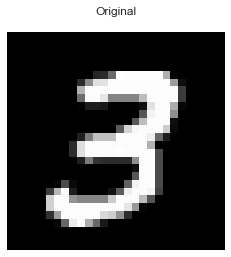

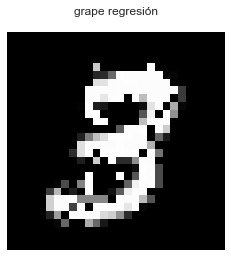

14


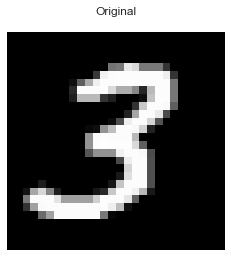

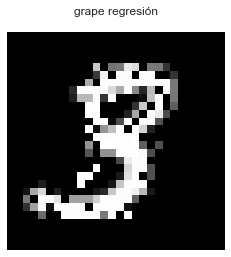

30


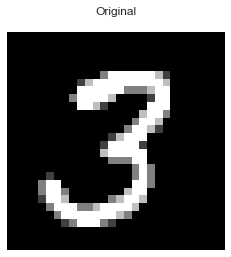

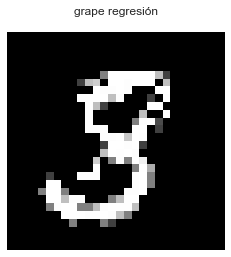

39


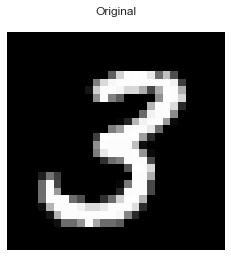

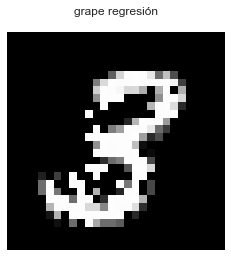

95


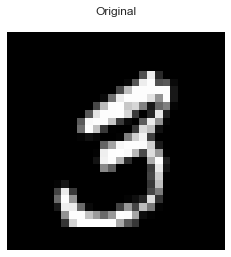

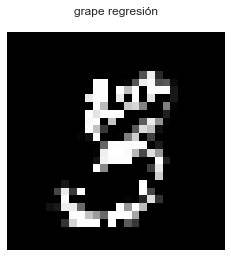

In [52]:
## Idem con el modelo por fases
df_Xc=np.loadtxt(ruta+ruta2+"resultados_prediccion3Orig.txt",  delimiter=',').astype(int)
df_Xg=np.loadtxt(ruta+ruta2+"resultados_prediccion3_F.txt",  delimiter=',').astype(int)

# [0, 12, 13, 14, 16, 30, 39, 95]
for indice in [0, 14, 30, 39, 95]:
    print(indice)    
    pintaDigitoReco(df_Xc,indice,"Original\n")
    pintaDigitoReco(df_Xg,indice,"grape regresión\n")